<a href="https://colab.research.google.com/github/aksnd/kaggle_dacon_projects/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/stock_market_analysis_pytorch_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q yfinance

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year -2, end.month, end.day)

for stock in tech_list:
  globals()[stock] = yf.download(stock, start, end) #일종의 변수 만드는 방식

#결과적으로 AAPL, GOOG, MSFT,AMZN이라는 변수에 다운받은 값이 들어가게됨

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE","MICROSOFT","AMAZON"]

for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-04-14,170.619995,171.270004,165.039993,165.289993,163.422440,75329400,APPLE
2022-04-18,163.919998,166.600006,163.570007,165.070007,163.204941,69023900,APPLE
2022-04-19,165.020004,167.820007,163.910004,167.399994,165.508606,67723800,APPLE
2022-04-20,168.759995,168.880005,166.100006,167.229996,165.340530,67929800,APPLE
2022-04-21,168.910004,171.529999,165.910004,166.419998,164.539719,87227800,APPLE
2022-04-22,166.460007,167.869995,161.500000,161.789993,159.961975,84882400,APPLE
2022-04-25,161.119995,163.169998,158.460007,162.880005,161.039703,96046400,APPLE
2022-04-26,162.250000,162.339996,156.720001,156.800003,155.028397,95623200,APPLE
2022-04-27,155.910004,159.789993,155.380005,156.570007,154.800964,88063200,APPLE


In [6]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,165.156128,166.918164,163.556427,165.319541,164.508543,6.906570e+07
std,18.712336,18.392981,18.942725,18.675741,18.981814,2.418219e+07
min,126.010002,127.769997,124.169998,125.019997,124.166641,2.404830e+07
25%,148.869995,150.919998,147.240005,149.350006,148.119370,5.182690e+07
50%,168.490005,169.199997,166.250000,167.529999,166.458008,6.452200e+07
75%,180.669998,182.229996,178.550003,180.710007,180.238220,8.022360e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.826020e+08


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-04-14 to 2024-04-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          501 non-null    float64
 1   High          501 non-null    float64
 2   Low           501 non-null    float64
 3   Close         501 non-null    float64
 4   Adj Close     501 non-null    float64
 5   Volume        501 non-null    int64  
 6   company_name  501 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.3+ KB


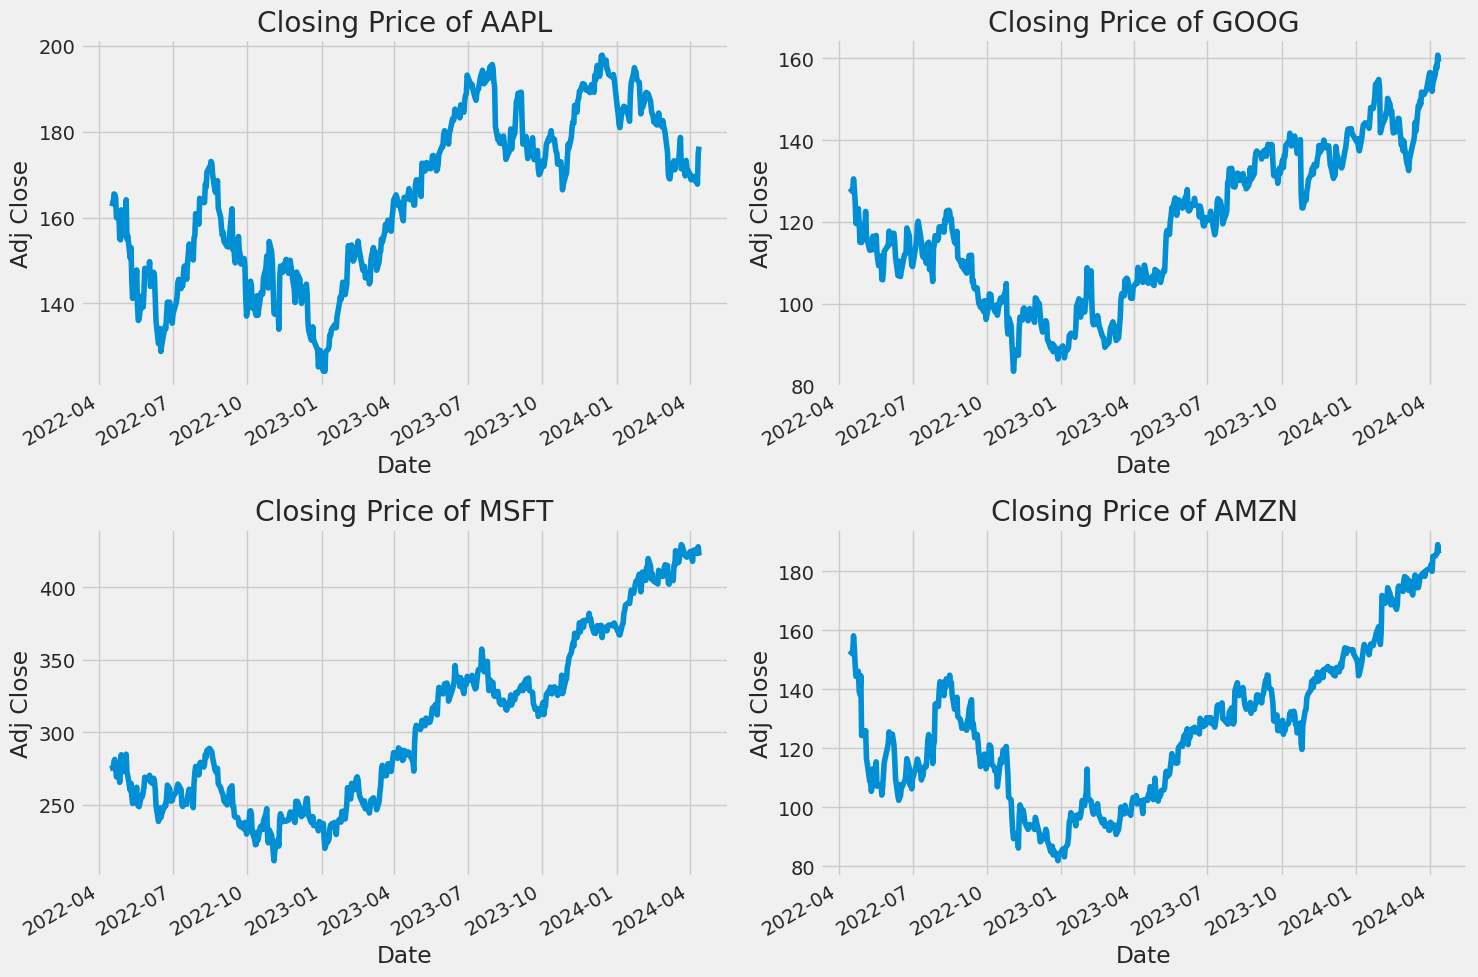

In [8]:
plt.figure(figsize= (15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2 ,i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.title(f"Closing Price of {tech_list[i-1]}")

plt.tight_layout()

preidcting the price stock price of APPLE inc

In [9]:
# Define the ticker symbol(s) of the asset(s) you want to retrieve data for

# Specify the start and end dates for the data retrieval
end = datetime.now()

# Retrieve the historical market data from Yahoo Finance
df = pdr.get_data_yahoo('AAPL',start='2014-01-01', end=datetime.now())

print(df.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-01-02  19.845715  19.893929  19.715000  19.754642  17.296654  234684800
2014-01-03  19.745001  19.775000  19.301071  19.320715  16.916727  392467600
2014-01-06  19.194643  19.528570  19.057142  19.426071  17.008968  412610800
2014-01-07  19.440001  19.498571  19.211430  19.287144  16.887329  317209200
2014-01-08  19.243214  19.484285  19.238930  19.409286  16.994267  258529600


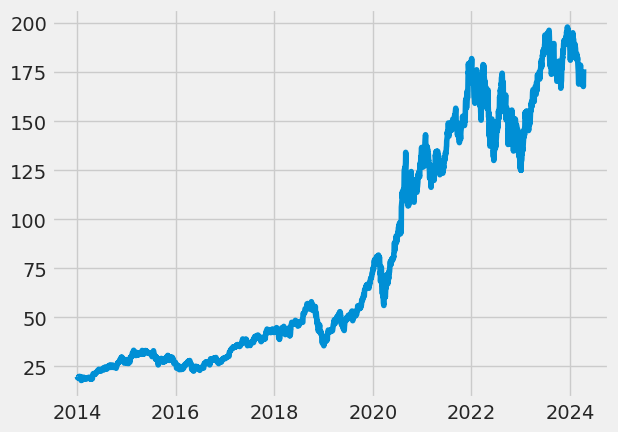

In [10]:
plt.plot(df['Close'])
plt.show()

In [11]:
data = df.filter(['Close'])
dataset = data.values

training_data_len = int(np.ceil(len(dataset)*0.95))

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01057001],
       [0.00816279],
       [0.00874725],
       ...,
       [0.8317437 ],
       [0.87201866],
       [0.88039547]])

In [13]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(80, len(train_data)): #앞 60개를 통해 다음걸 예측하라
    x_train.append(train_data[i-80:i-20, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (-1, 1))
# x_train.shape
print(x_train.shape)
print(y_train.shape)

(2378, 60)
(2378, 60, 1)
(2378, 1)


In [14]:
import torch
import torch.nn as nn
x_train = torch.from_numpy(x_train).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)

In [15]:
x_train[:,-1,:].shape

torch.Size([2378, 1])

In [19]:
input_size = 1
hidden_size = 128
num_layers = 2
output_size =1

class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, output_size):
      super(LSTMModel, self).__init__()
      self.hidden_size = hidden_size
      self.num_layers = num_layers

      # Define the LSTM layer
      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
      #batch_first 가 true일때 입력값은 batch, seq, feature로
      #feature는 1(특성 1개임), seq는 60(특성한개의 크기), batch는 batch_size 지금은 1임

      # Define the fully connected layer
      self.fc1 = nn.Linear(hidden_size, 25)
      self.fc2 = nn.Linear(25,output_size)
  def forward(self, x):
      # Initialize hidden state with zeros
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

      # Initialize cell state with zeros
      c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

      # Forward propagate LSTM
      out, _ = self.lstm(x, (h0, c0))  # out shape: (batch_size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      out = self.fc1(out[:, -1, :]) #out[:,-1,:]은 중간거는 마지막것만 취급한다는 뜻이고
      out = self.fc2(out)
      #중간차원이 날아가 torch([hidden_size,1])을 self.fc에 넣게됨
      return out


In [20]:
model = LSTMModel(input_size=input_size, hidden_size=hidden_size,
                  num_layers=num_layers, output_size=output_size)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
print(model)


LSTMModel(
  (lstm): LSTM(1, 128, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=128, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=1, bias=True)
)


In [21]:
num_epochs = 100
hist = np.zeros(num_epochs)


for t in range(num_epochs):
  y_train_pred = model(x_train)
  loss = loss_fn(y_train_pred,y_train)

  print("Epoch ", t, "MSE:", loss.item())
  hist[t]=loss.item()

  optimizer.zero_grad()
  loss.backward()
  # Update parameters
  optimizer.step()

Epoch  0 MSE: 0.19249610602855682
Epoch  1 MSE: 0.17145347595214844
Epoch  2 MSE: 0.15259617567062378
Epoch  3 MSE: 0.13497143983840942
Epoch  4 MSE: 0.11811783909797668
Epoch  5 MSE: 0.10217472910881042
Epoch  6 MSE: 0.08847037702798843
Epoch  7 MSE: 0.08108627051115036
Epoch  8 MSE: 0.0871133804321289
Epoch  9 MSE: 0.09128180146217346
Epoch  10 MSE: 0.08426066488027573
Epoch  11 MSE: 0.07583653181791306
Epoch  12 MSE: 0.07076600193977356
Epoch  13 MSE: 0.06847767531871796
Epoch  14 MSE: 0.06713876873254776
Epoch  15 MSE: 0.0652695745229721
Epoch  16 MSE: 0.06186238303780556
Epoch  17 MSE: 0.05617431551218033
Epoch  18 MSE: 0.04761691391468048
Epoch  19 MSE: 0.03632489964365959
Epoch  20 MSE: 0.03083387389779091
Epoch  21 MSE: 0.041815392673015594
Epoch  22 MSE: 0.021296624094247818
Epoch  23 MSE: 0.02524094469845295
Epoch  24 MSE: 0.030331289395689964
Epoch  25 MSE: 0.031944639980793
Epoch  26 MSE: 0.029292766004800797
Epoch  27 MSE: 0.022663384675979614
Epoch  28 MSE: 0.014092879369

In [22]:
test_data = scaled_data[training_data_len-80: , :]

x_test = []
y_test = []

for i in range(80, len(test_data)): #앞 60개를 통해 다음걸 예측하라
    x_test.append(test_data[i-80:i-20, 0])
    y_test.append(test_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape the data
print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = np.reshape(y_test, (-1, 1))
# x_train.shape
print(x_test.shape)

x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)
print(x_test.shape)

(129, 60)
(129, 60, 1)
torch.Size([129, 60, 1])


In [23]:
import math
from sklearn.metrics import mean_squared_error
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 7.80 RMSE
Test Score: 10.81 RMSE


<ipython-input-24-dd676188a826>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_test_pred


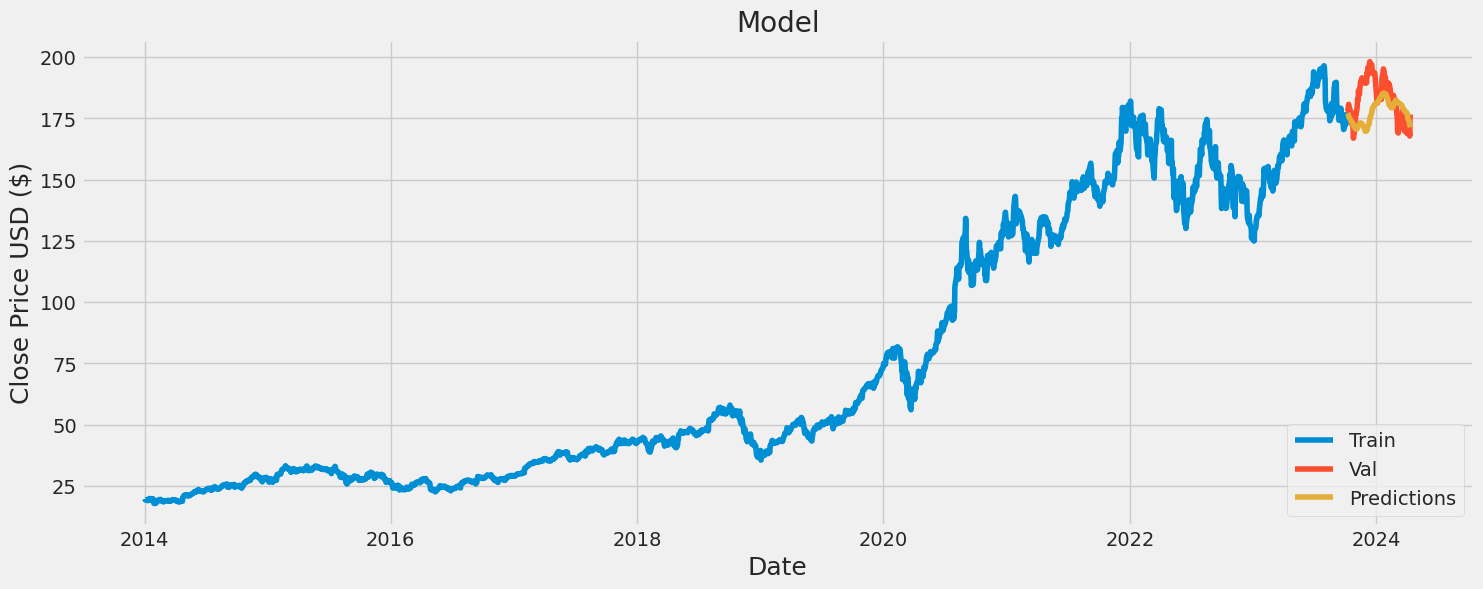

In [24]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = y_test_pred
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()